In [1]:
import numpy as np
import scipy.io as sc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
mat = sc.loadmat('D:/PRML lab/mnist_all.mat')

In [3]:
train3 = mat.get('train3')
train8 = mat.get('train8')

In [4]:
train3.shape
train = np.reshape(train3[0,:],(-28,28))

In [5]:
train8.shape

(5851, 784)

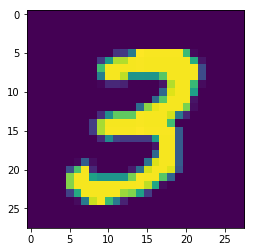

In [6]:
plot = plt.imshow(train)
plt.show()

In [7]:
index3 = np.random.randint(6131,size=500)
index8 = np.random.randint(5851,size=500)

Train_data1 = train3[index3,:]
Train_data2 = train8[index8,:]

print(Train_data1.shape)
print(Train_data2.shape)

Train_Data = np.concatenate((Train_data1,Train_data2),axis=0)
print(Train_Data.shape)
Mean = np.mean(Train_Data,axis=0)
Mean.shape
Train_Data = np.subtract(Train_Data,Mean)

(500, 784)
(500, 784)
(1000, 784)


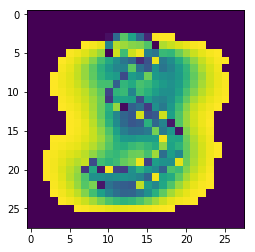

In [8]:
Train_Data = Train_Data.astype(np.uint8)
Train = np.reshape(Train_Data[0],(-28,28))
plt.imshow(Train)
plt.show()

In [9]:
Train_Data = Train_Data.astype(np.double)
Cov = np.matmul(np.transpose(Train_Data),Train_Data)
eigen_value,eigen_vector = np.linalg.eig(Cov)
vector = np.abs(eigen_vector)[:,0:3]

In [10]:
Train_Data.shape

(1000, 784)

In [11]:
vector

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [12]:
y = np.matmul(Train_Data,vector)

In [13]:
y.shape

(1000, 3)

In [14]:
label = np.zeros(1000)
label[0:500] = 3
label[500:1000] = 8

In [22]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(fit_intercept=True)
fit = lg.fit(y,label)

pred = lg.predict(y)

In [24]:
print(fit.coef_)

from sklearn.metrics import accuracy_score

print('Accuracy after Logistic Regression:',accuracy_score(pred,label))

[[ 0.00316311 -0.00062427 -0.0034713 ]]
Accuracy after Logistic Regression: 0.537


In [32]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(y,label)
pred = gnb.predict(y)

In [36]:
from sklearn.metrics import accuracy_score

print('Accuracy after PCA:',accuracy_score(pred,label))

Accuracy after PCA: 0.569
